<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-25/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_1_%CE%95%CE%BD%CE%B4%CE%B5%CE%B9%CE%BA%CF%84%CE%B9%CE%BA%CE%AE_%CE%9B%CF%8D%CF%83%CE%B7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Μέρος Ι - Λογιστική Παλινδρόμηση


# Βιβλιοθήκες


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error


# Ερώτημα 1



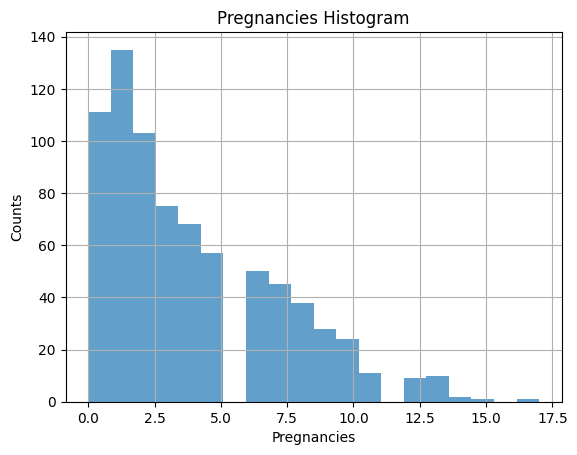

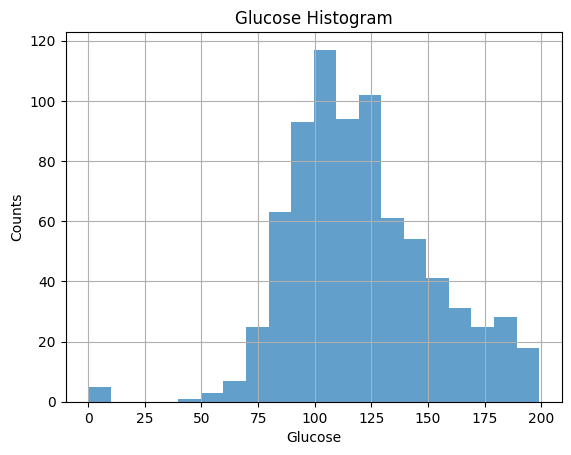

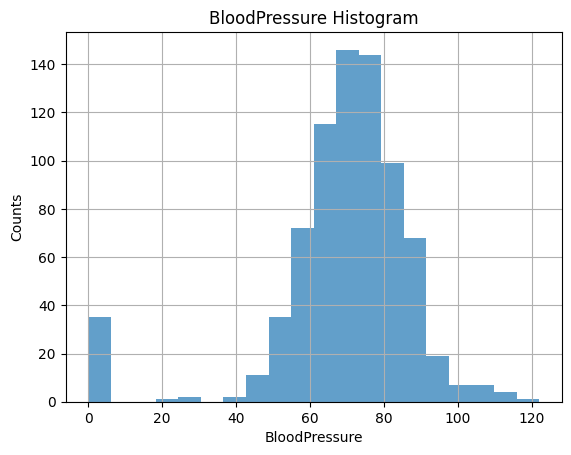

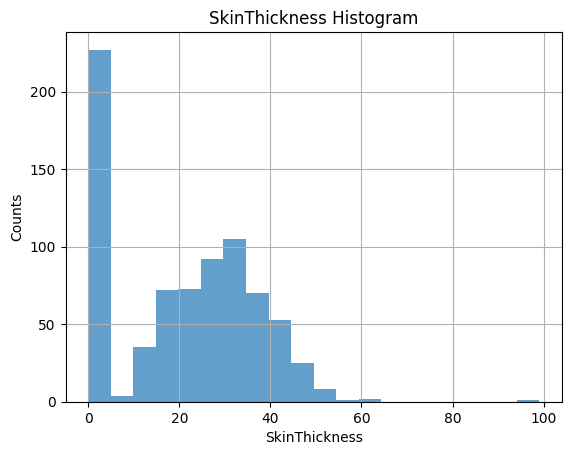

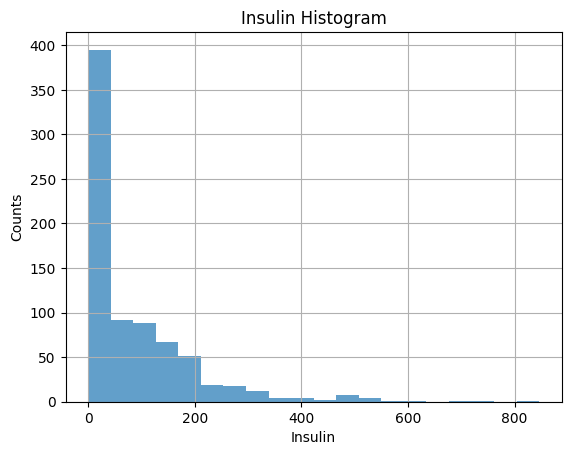

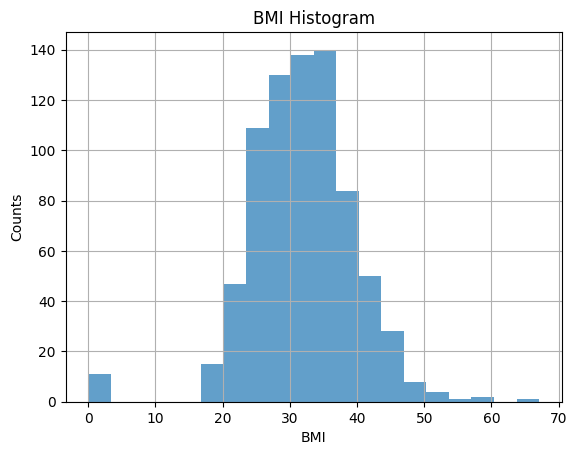

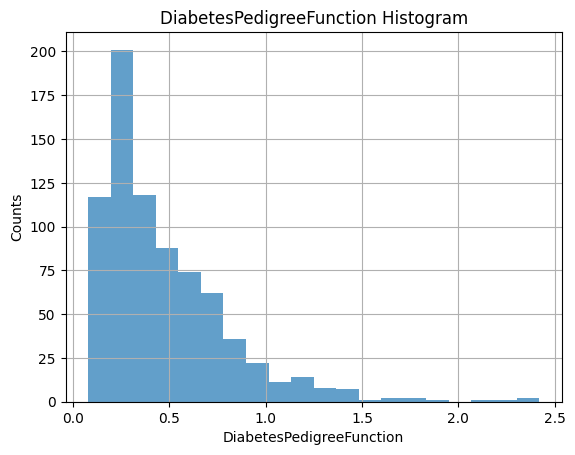

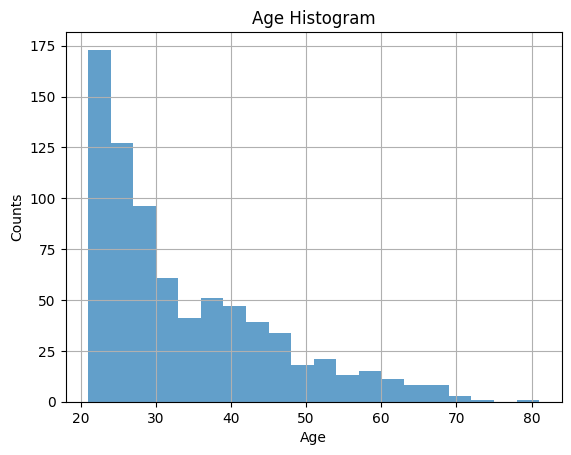

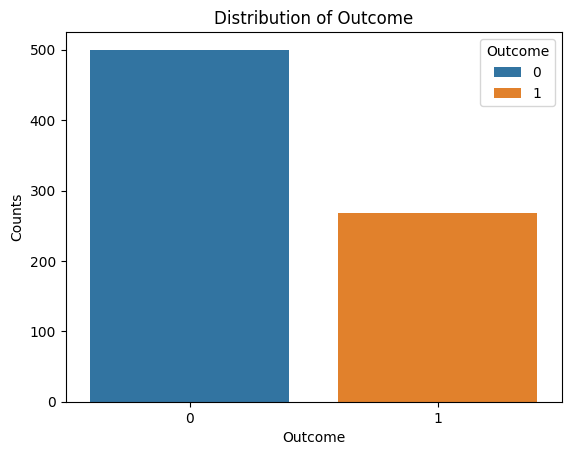

In [ ]:
df = pd.read_csv('diabetes.csv')

df.describe()

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for f in features:
  df[f].hist(bins=20, alpha=0.7)
  plt.title(f'{f} Histogram')
  plt.xlabel(f)
  plt.ylabel('Counts')
  plt.show()

sns.countplot(x='Outcome', data=df, hue='Outcome')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()



# Σχόλια Κριτών

*Σωστά γραφήματα, αλλά θα μπορο΄ύσαν να τυπωθούν σε ένα group από plots, ώστε να ναι πιο ευδιάκριτο.*

# Ερώτημα 2


Η ποιότητα των δεδομένων θεωρώ πως είναι κακή για τους εξής λόγους:
1. Παρατηρούνται αρκετές μηδενικές τιμές στα δεδομένα όπως στο BMI, Insulin, Clucose, Blood Preasure, Skin Thickness.
2. Οι μηδενικές τιμές μπορεί πιθανώς να οφείλονται και σε missing τιμές.
3. Κάποιες τιμές φαίνεται ότι δεν είναι ρεαλιστικές, όπως για παράδειγμα οι εγκυμοσύνες, γεγονός που μπορεί να επηρεάσει σημαντικά την ορθή εξαγωγή πρόβλεψης.

# Σχόλια Κριτών

*Πολύ Σωστά!*

# Ερώτημα 3


Η κατανομή που ακολουθεί η μεταβλητή Age είναι right-skewed, δηλαδή συσσωρεύει τα περισσότερα δεδομένα στο αριστερό μέρος και όσο προχωράει προς τα δεξία μειώνεται  το πλήθος των δεδομέων.
Η κατανομή αυτή είναι κάλη από την άποψη ότι έχει αρκετά παραδείγματα για να ανιχνευτεί διαβήτης σε μικρές ηλικίες.
Ταυτόχρονα είναι κακή για μεγάλες ηλικίες, καθώς δεν υπάρχουν αρκετά παραδείγματα που συνεπάγεται δυσκολία ανίχνευσης διαβήτη.

# Σχόλια Κριτών

*Πράγματι, εδώ παρατηρείται η **γνωστή κατανομή right-skewed**... (γκουχ γκουχ)... Εναλλακτικά, φαίνεται πως είναι εκθετική κατανομή όπου οι περισσότερες τιμές συγκεντρώνονται στις νεαρές ηλικίες, κάνοντας το μοντέλο μη-αξιόπιστο στις προβλέψεις του για τους ηλικιωμένους, ακόμη και αν πετύχει ικανοποιητική ακρίβεια κατά την εκπαίδευση.*

# Ερώτημα 4


In [ ]:
df[['Outcome','Glucose', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].corr()['Outcome']

,Outcome
Outcome,1.000000
Glucose,0.466581
Pregnancies,0.221898
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356


Για να διαπιστώσουμε την σχέση μεταξύ των επιπέδων γλυκόζης και της πιθανότητας εμφάνισης διαβήτη, μπορούμε να χρησιμοποιήσουμε την ανάλυση συσχέτισης (correlation analysis) των χαρακτηριστικών του dataset.
Παρατηρούμε ότι το Glucose έχει τη μεγαλύτερη θετική συσχέτιση και είναι πιο σχετικό με την πιθανότητα εμφάνισης διαβήτη.

# Σχόλια Κριτών

*Εναλλακτικά, αν εξετάσουμε τους top 20/50/100 ασθενής με τη μεγαλύτερη ποσότητα γλυκόζης στο αίμα, θα παρατηρήσουμε πως οι περισσότεροι από αυτούς έχουν διαβήτη.*

# Ερώτημα 5

In [ ]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((537, 8), (537,), (231, 8), (231,))

In [ ]:
# πλήθος παραδειγμάτων εκπαίδευσης και επικύρωσης
x_train.shape, x_val.shape

((537, 8), (231, 8))

# Ερώτημα 6

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred = model.predict(x_val)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
accuracy_final = round(accuracy,2)
print(f'The accuracy of the model is: {accuracy_final}')

The accuracy of the model is: 0.78


# Ερώτημα 7


Το χειρότερο είναι το μοντέλο να προβλέψει ότι κάποιος δεν έχει διαβήτη ενώ έχει (False Negative). Ο ασθενής μπορεί να μην λάβει τις απαραίτητες ιατρικές παρεμβάσεις ή συμβουλές για την πρόληψη ή την διαχείριση του διαβήτη. Αυτό μπορεί να οδηγήσει σε σοβαρές επιπλοκές υγείας στο μέλλον. Οι ψευδώς αρνητικές προβλέψεις είναι επικίνδυνες γιατί μπορούν να έχουν σοβαρές και μακροχρόνιες συνέπειες για την υγεία του ασθενούς.

# Σχόλια Κριτών

*Πολύ Σωστά!*

# Ερώτημα 8

<ipython-input-11-3bfc3b912764>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_by_age_group = validation_df.groupby('Age Group').apply(
<ipython-input-11-3bfc3b912764>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_age_group = validation_df.groupby('Age Group').apply(


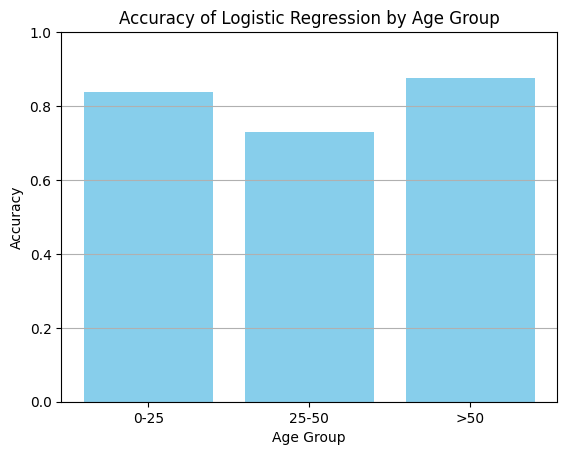

In [ ]:
validation_df = pd.DataFrame(x_val, columns=input_df.columns)
validation_df['Outcome'] = y_val
validation_df['Predicted'] = y_pred

bins = [0, 25, 50, np.inf]
labels = ['0-25', '25-50', '>50']
validation_df['Age Group'] = pd.cut(validation_df['Age'], bins=bins, labels=labels, right=False)

accuracy_by_age_group = validation_df.groupby('Age Group').apply(
    lambda group: accuracy_score(group['Outcome'], group['Predicted'])
)

plt.bar(accuracy_by_age_group.index, accuracy_by_age_group.values, color='skyblue')
plt.title('Accuracy of Logistic Regression by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Ο ταξινομητής έχει καλή απόδοση για ασθενείς μικρών ηλικιών (0-25) και μεγάλων ηλικιών (>50). Αυτό μπορεί να σημαίνει ότι τα χαρακτηριστικά των ασθενών αυτών είναι πιο διακριτά ή ότι η κλινική εικόνα τους είναι πιο ευδιάκριτη.
Ταυτόχρονα παρατηρώ ότι ο ταξινομητής δεν λειτουργεί τόσο καλα στις ενδιάμεσες ηλικίες (25-50). Αυτό μπορεί να οφείλεται σε ανεπαρκή δεδομένα εκπαίδευσης ή θόρυβο στα δεδομένα για αυτή την ηλικιακή ομάδα.

# Σχόλια Κριτών

*Πολύ καλή απάντηση!*

# Ερώτημα 9

In [ ]:
model_l1 = LogisticRegression(penalty='l1', C=0.5, solver='liblinear', random_state=0)
model_l1.fit(x_train, y_train)
y_pred_l1 = model_l1.predict(x_val)
accuracy_l1 = accuracy_score(y_val, y_pred_l1)
print(f"L1 Regularization Accuracy: {round(accuracy_l1,2)}")

L1 Regularization Accuracy: 0.79


In [ ]:
model_l2 = LogisticRegression(penalty='l2', C=0.5, solver='liblinear', random_state=0)
model_l2.fit(x_train, y_train)
y_pred_l2 = model_l2.predict(x_val)
accuracy_l2 = accuracy_score(y_val, y_pred_l2)
print(f"L2 Regularization Accuracy: {round(accuracy_l2, 2)}")

L2 Regularization Accuracy: 0.79


In [ ]:
model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_elasticnet.fit(x_train, y_train)
y_pred_elasticnet = model_elasticnet.predict(x_val)
accuracy_elasticnet = accuracy_score(y_val, y_pred_elasticnet)
print(f"Elastic Net Regularization Accuracy: {round(accuracy_elasticnet, 2)}")

Elastic Net Regularization Accuracy: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
results = {
    'Regularization Type': ['L1', 'L2', 'Elastic Net'],
    'Accuracy': [round(accuracy_l1, 2), round(accuracy_l2, 2), round(accuracy_elasticnet, 2)]
}

results_df = pd.DataFrame(results)
print(results_df)

  Regularization Type  Accuracy
0                  L1      0.79
1                  L2      0.79
2         Elastic Net      0.72


# Ερώτημα 10

In [ ]:
accuracies = []

for seed in range(10):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=seed)
    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f'Μέσος όρος ακρίβειας: {round(mean_accuracy, 2)}')
print(f'Τυπική απόκλιση ακρίβειας: {round(std_accuracy, 2)}')


Μέσος όρος ακρίβειας: 0.77
Τυπική απόκλιση ακρίβειας: 0.02


# Μέρος ΙΙ - Γραμμική Παλινδρόμηση

# Ερώτημα 1

In [ ]:
df = pd.read_csv('diabetes.csv')
input_df = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
x = input_df.to_numpy()
y = df['Insulin'].to_numpy()
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=0)


# Ερώτημα 2

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Squared Error (MSE): 10883.74
Mean Absolute Error (MAE): 79.83


Η καταλληλότερη μετρική σε αυτή την περίπτωση είναι το MAE το οποίο υπολογίζει το μέσο όρο των απόλυτων διαφορών μεταξύ πραγματικών και προβλεπόμενων τιμών χωρίς να δίνει έμφαση στις ακαραίες τιμές. Αυτό είναι σημαντικό καθώς στο δεδομένο dataset παρατηρούνται αρκετές ακραίες τιμές. Έτσι, η χρήση του MAE εξασφαλίζει ότι οι προβλέψεις μας αντικατοπτρίζουν καλύτερα την πραγματικότητα, χωρίς να επηρεάζονται υπερβολικά από τις ακραίες περιπτώσεις.


# Ερώτημα 3

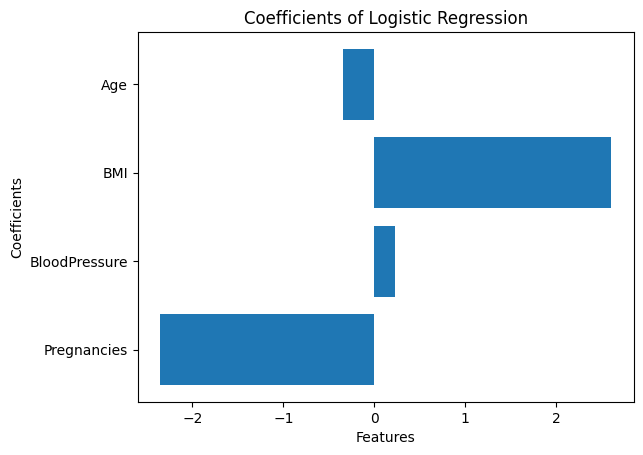

In [ ]:
features = input_df.columns
coefficients = model.coef_
plt.barh(input_df.columns, coefficients)
plt.title('Coefficients of Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Μπορούμε να χρησιμοποιήσουμε τα βάρη της παλινδρόμησης για να εξετάσουμε τη σημαντικότητα κάθε χαρακτηριστικού αφού τα βάρη δείχνουν την επιρροή κάθε χαρακτηριστικού στην πρόβλεψη. Μεγαλύτερες απόλυτες τιμές συντελεστών σημαίνουν ότι το χαρακτηριστικό έχει μεγαλύτερη επιρροή.
Το χαρακτηριστικό με τον μεγαλύτερο συντελεστή (σε απόλυτη τιμή) είναι το BMI, που επηρεάζει περισσότερο την πρόβλεψη της ινσουλίνης. Το χαρακτηριστικό Pregnancies έχει επίσης σημαντική επίδραση, αλλά σε αρνητική κατεύθυνση. Τα χαρακτηριστικά με θετικούς συντελεστές δείχνουν ότι η αύξηση τους αυξάνει τις προβλεπόμενες τιμές ινσουλίνης, ενώ τα χαρακτηριστικά με αρνητικούς συντελεστές δείχνουν ότι η αύξηση τους μειώνει τις προβλεπόμενες τιμές ινσουλίνης.
Ενδεχόμενα προβλήματα αυτής της μεθόδου είναι είναι η κλιμάκωση των δεδομένων, καθώς τα χαρακτηριστικά μπορεί να μην έχουν ίδια μονάδα μέτρησης με αποτέλεσμα χαρακτηριστικά με μεγαλύτερα αριθμητικά μεγέθη να έχουν μεγαλύτερα βάρη. Έτσι τα δεδομένα πρέπει να κλιμακωθούν μέσω κανονικοποίησης. Ακόμα, αν δύο ή περισσότερα χαρακτηριστικά είναι  πολύ συσχετισμένα μεταξύ τους, είναι δύσκολο να προσδιοριστεί ποιο έχει την πραγματική επίδραση στην εξαρτημένη μεταβλητή με αποτέλεσμα οι συντελεστές να μην είναι τόσο αξιόπιστοι.


# Σχόλια Κριτών

*Πράγματι κάθε μεταβλητή έχει διαφορετικό εύρος τιμώςν το οποίο μπορεί να επιρεάσει άμεσα τις απ΄όλυτες τιμές των coefficient. Επιπλέον, το Linear Regression βρίσκει απλώς τα βάρη που οδηγούν στη βέλτιστη λύση, χωρίς όμως να λαμβάνει υπόψιν τις τιμές στα βάρη αυτά.*

# Ερώτημα 4

In [ ]:
alpha_values = [0.2, 0.4, 0.6, 0.8, 1.0]
results = []
for alpha in alpha_values:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, y_pred)
    results.append({'Alpha': alpha, 'MAE': mae})

results_df = pd.DataFrame(results)
print(results_df)

   Alpha        MAE
0    0.2  79.826659
1    0.4  79.824444
2    0.6  79.822228
3    0.8  79.820012
4    1.0  79.817797


# Ερώτημα 5

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
linear_coefficients = model.coef_
lasso_coefficients = lasso_model.coef_
comparison_df = pd.DataFrame({
    'Feature': input_df.columns,
    'Linear_Coefficients': linear_coefficients,
    'Lasso_Coefficients': lasso_coefficients
})
print(comparison_df)

important_feature1 = input_df.columns[np.argmax(np.abs(linear_coefficients))]
print(f'\nΤο σημαντικότερο χαρακτηριστικό σύμφωνα με το Linear είναι: {important_feature1}')
important_feature2 = input_df.columns[np.argmax(np.abs(lasso_coefficients))]
print(f'Το σημαντικότερο χαρακτηριστικό σύμφωνα με το Lasso είναι: {important_feature2}')


         Feature  Linear_Coefficients  Lasso_Coefficients
0    Pregnancies            -2.251193           -2.251193
1  BloodPressure             0.224390            0.224390
2            BMI             2.595748            2.595748
3            Age            -0.351370           -0.351370

Το σημαντικότερο χαρακτηριστικό σύμφωνα με το Linear είναι: BMI
Το σημαντικότερο χαρακτηριστικό σύμφωνα με το Lasso είναι: BMI


# Ερώτημα 6

In [ ]:
mae_all = mean_absolute_error(y_val, y_pred)
print(f'MAE με όλα τα χαρακτηριστικά: {mae_all:.2f}')
input_df_reduced = input_df.drop(columns=['BloodPressure'])
x_reduced = input_df_reduced.to_numpy()
x_train_reduced, x_val_reduced, y_train, y_val = train_test_split(x_reduced, y, test_size=0.3, random_state=0)
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(x_train_reduced, y_train)
y_pred_reduced = linear_model_reduced.predict(x_val_reduced)
mae_reduced = mean_absolute_error(y_val, y_pred_reduced)
print(f'MAE με τα υπόλοιπα χαρακτηριστικά: {mae_reduced:.2f}')
print(f'Διαφορά MAE: {mae_all - mae_reduced:.2f}')


MAE με όλα τα χαρακτηριστικά: 79.82
MAE με τα υπόλοιπα χαρακτηριστικά: 80.16
Διαφορά MAE: -0.34


Την χαμηλότερη βαρύτητα έχει το χαρακτηριστικό BloodPressure.
Η διαφορά -0.34 υποδεικνύει ότι το MAE με όλα τα χαρακτηριστικά είναι χαμηλότερο από το MAE με τα υπόλοιπα χαρακτηριστικά. Αυτό σημαίνει ότι το μοντέλο επιτυγχάνει καλύτερα αποτελέσματα όταν περιλαμβάνει το Blood Pressure ως χαρακτηριστικό.
Αυτά τα αποτελέσματα υποδεικνύουν ότι το χαρακτηριστικό Blood Pressure έχει κάποια αξία στην πρόβλεψη της ινσουλίνης, παρόλο που το βάρος του μπορεί να είναι χαμηλότερο σε σύγκριση με άλλα χαρακτηριστικά.

# Σχόλια Κριτών

*Πράγματι, η διαφορά 0.34 στο ΜΑΕ υπονοεί πως υπάρχει κάποια σημασία, αλλά είναι αμεληταία. Οπότε, θα μπορούσε να εξαληφθεί, διευκολύνοντας τη διαδικασία για τους χρήστες, αλλά και την εκπαίδευση του μοντέλου.*